In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# クロスバリデーション用パッケージ
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
DATA_PATH = '/content/gdrive/My Drive/Colab Notebooks/Signate/stock_price_pred/'
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
except ModuleNotFoundError as e:
  DATA_PATH = './data/'

# データ読み込み
train = pd.read_csv(DATA_PATH + TRAIN_FILE,header=0)
test = pd.read_csv(DATA_PATH + TEST_FILE,header=0)

Mounted at /content/gdrive


In [2]:
print(train.head())
print(test.head())

         Date   Open   High    Low  Close  Up
0  2004-01-02  50.85  50.91  50.62  50.72   1
1  2004-01-05  50.75  50.84  50.61  50.79   1
2  2004-01-06  50.87  51.26  50.86  51.15   1
3  2004-01-07  51.45  51.54  51.29  51.51   0
4  2004-01-08  51.15  51.33  51.02  51.28   0
         Date    Open    High     Low   Close
0  2012-01-19  110.79  110.82  109.96  110.39
1  2012-01-20  110.45  111.10  110.36  110.73
2  2012-01-23  110.95  111.10  109.65  110.36
3  2012-01-24  110.16  110.16  108.13  108.39
4  2012-01-25  106.25  107.11  105.97  106.89


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2026 non-null   object 
 1   Open    2026 non-null   float64
 2   High    2026 non-null   float64
 3   Low     2026 non-null   float64
 4   Close   2026 non-null   float64
 5   Up      2026 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 95.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1200 non-null   object 
 1   Open    1200 non-null   float64
 2   High    1200 non-null   float64
 3   Low     1200 non-null   float64
 4   Close   1200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 47.0+ KB
None


In [4]:
train["Date"]=pd.to_datetime(train['Date'],format="%Y-%m-%d")
test["Date"]=pd.to_datetime(test['Date'],format="%Y-%m-%d")

In [5]:
train.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
Up                int64
dtype: object

In [6]:
#テストデータの日付のデータフレームを作成
#最終的にテスト分析結果とconcatで横結合する。
def test_date_df(X,num_date):
  test_drop = X.iloc[5::6]
  X_t_date_df = test_drop.drop(["Open","High","Low","Close"],axis=1)
  X_t_date_df = X_t_date_df.reset_index(drop=True)
  return X_t_date_df
num_date_s = 6
X_test_date_list = test_date_df(X=test, num_date=num_date_s)
print(X_test_date_list)

          Date
0   2012-01-26
1   2012-02-09
2   2012-02-24
3   2012-03-09
4   2012-03-23
..         ...
195 2019-10-25
196 2019-11-08
197 2019-11-22
198 2019-12-09
199 2019-12-23

[200 rows x 1 columns]


In [7]:
train.set_index(keys='Date',inplace=True)
test.set_index(keys='Date',inplace=True)
print(train)

              Open    High     Low   Close  Up
Date                                          
2004-01-02   50.85   50.91   50.62   50.72   1
2004-01-05   50.75   50.84   50.61   50.79   1
2004-01-06   50.87   51.26   50.86   51.15   1
2004-01-07   51.45   51.54   51.29   51.51   0
2004-01-08   51.15   51.33   51.02   51.28   0
...            ...     ...     ...     ...  ..
2012-01-11  108.62  109.00  108.41  108.86   1
2012-01-12  109.68  109.90  109.44  109.83   0
2012-01-13  109.53  109.72  109.08  109.66   1
2012-01-17  109.99  110.47  109.57  109.96   1
2012-01-18  110.06  110.82  109.94  110.58   0

[2026 rows x 5 columns]


In [8]:
print(train.describe())
print(test.describe())

              Open         High          Low        Close           Up
count  2026.000000  2026.000000  2026.000000  2026.000000  2026.000000
mean     72.338425    72.714126    71.977957    72.353968     0.515795
std      14.876363    14.968429    14.778285    14.874404     0.499874
min      50.430000    50.650000    50.400000    50.610000     0.000000
25%      57.702500    57.942500    57.415000    57.702500     0.000000
50%      73.970000    74.430000    73.325000    73.835000     1.000000
75%      81.230000    81.645000    80.717500    81.060000     1.000000
max     110.510000   111.020000   110.380000   110.810000     1.000000
              Open         High          Low        Close
count  1200.000000  1200.000000  1200.000000  1200.000000
mean    130.850575   131.469433   130.231283   130.850175
std      29.564138    29.759571    29.304941    29.515361
min      97.260000    97.690000    96.930000    97.470000
25%     106.597500   107.120000   106.225000   106.630000
50%     120.5

              Open    High     Low   Close
Date                                      
2012-01-03  110.34  110.55  108.33  108.40
2012-01-04  106.97  107.90  106.70  107.19
2012-01-05  108.98  109.70  108.36  109.26
2012-01-06  109.46  109.99  109.29  109.86
2012-01-09  110.51  110.55  109.45  109.55
2012-01-10  109.54  109.70  108.85  109.12
2012-01-11  108.62  109.00  108.41  108.86
2012-01-12  109.68  109.90  109.44  109.83
2012-01-13  109.53  109.72  109.08  109.66
2012-01-17  109.99  110.47  109.57  109.96
2012-01-18  110.06  110.82  109.94  110.58


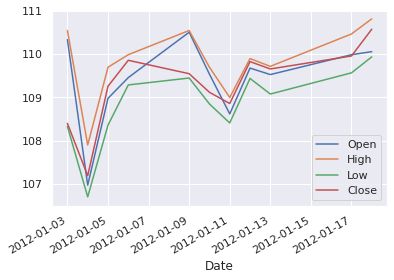

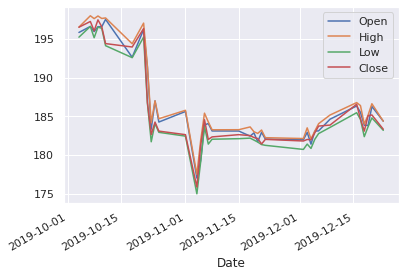

In [9]:
train_check = train.loc[train.index > datetime(2012,1,1),["Open","High","Low","Close"]]
test_check = test.loc[test.index > datetime(2019,10,1),:]
print(train_check)

train_check.plot(kind="line")
test_check.plot(kind="line")
plt.show()

In [10]:
train["Body"]= train["Open"] - train["Close"]
print(train.head())
test["Body"]= test["Open"] - test["Close"]
print(test.head())

             Open   High    Low  Close  Up  Body
Date                                            
2004-01-02  50.85  50.91  50.62  50.72   1  0.13
2004-01-05  50.75  50.84  50.61  50.79   1 -0.04
2004-01-06  50.87  51.26  50.86  51.15   1 -0.28
2004-01-07  51.45  51.54  51.29  51.51   0 -0.06
2004-01-08  51.15  51.33  51.02  51.28   0 -0.13
              Open    High     Low   Close  Body
Date                                            
2012-01-19  110.79  110.82  109.96  110.39  0.40
2012-01-20  110.45  111.10  110.36  110.73 -0.28
2012-01-23  110.95  111.10  109.65  110.36  0.59
2012-01-24  110.16  110.16  108.13  108.39  1.77
2012-01-25  106.25  107.11  105.97  106.89 -0.64


In [11]:
train['Rate']=((train['Close']-train['Close'].shift(1))/train['Close'].shift(1)).fillna(0)
test['Rate']=((test['Close']-test['Close'].shift(1))/test['Close'].shift(1)).fillna(0)

In [12]:
X_trainval = train.drop(columns=["Up"],inplace=False)
y_trainval = train["Up"]
X_test = test
print(X_test.head())

              Open    High     Low   Close  Body      Rate
Date                                                      
2012-01-19  110.79  110.82  109.96  110.39  0.40  0.000000
2012-01-20  110.45  111.10  110.36  110.73 -0.28  0.003080
2012-01-23  110.95  111.10  109.65  110.36  0.59 -0.003341
2012-01-24  110.16  110.16  108.13  108.39  1.77 -0.017851
2012-01-25  106.25  107.11  105.97  106.89 -0.64 -0.013839


In [13]:
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size=0.25,shuffle=False)

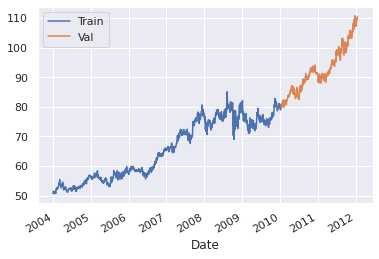

In [14]:
X_train["Close"].plot(kind="line")
X_val["Close"].plot(kind="line")

# 折れ線グラフの凡例を表示
plt.legend(["Train","Val"])

# 描画の実行
plt.show()

In [15]:
print(X_train)
print(X_val)

             Open   High    Low  Close  Body      Rate
Date                                                  
2004-01-02  50.85  50.91  50.62  50.72  0.13  0.000000
2004-01-05  50.75  50.84  50.61  50.79 -0.04  0.001380
2004-01-06  50.87  51.26  50.86  51.15 -0.28  0.007088
2004-01-07  51.45  51.54  51.29  51.51 -0.06  0.007038
2004-01-08  51.15  51.33  51.02  51.28 -0.13 -0.004465
...           ...    ...    ...    ...   ...       ...
2010-01-07  79.15  80.00  79.04  79.65 -0.50  0.007973
2010-01-08  79.97  80.08  79.45  79.63  0.34 -0.000251
2010-01-11  79.42  79.74  79.29  79.65 -0.23  0.000251
2010-01-12  79.77  80.26  79.75  80.26 -0.49  0.007659
2010-01-13  80.92  81.26  80.69  80.71  0.21  0.005607

[1519 rows x 6 columns]
              Open    High     Low   Close  Body      Rate
Date                                                      
2010-01-14   80.18   80.31   79.81   80.25 -0.07 -0.005699
2010-01-15   80.27   80.51   79.79   79.97  0.30 -0.003489
2010-01-19   80.13   80.

In [16]:
def get_standardized_t(X,num_date):
  # numpyに変換
  X = np.array(X)
  X_t_list = []
  for i in range(len(X) - num_date + 1):
    # 終端は含まれないので、[0:6]だと0から5までになる。
    X_t = X[i:i+num_date]
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X_t)
    X_t_list.append(X_standardized)
    # numpyでreturn
  return np.array(X_t_list)

# 期間の設定(6日間)
num_date = 6
# 関数get_standardized_tの呼び出し
X_train_t = get_standardized_t(X=X_train, num_date=num_date)
X_val_t = get_standardized_t(X=X_val, num_date=num_date)

def get_standardized_t_for_test(X,test_num_date):
  X = np.array(X)
  X_t_t_list = []
  # x_testについては、個別に関数(get_standardized_t_for_test)を作っている。
  # testデータは指定する際0:6,1:7ではなく0:6,7:12..としないといけないため。    
  # trainデータと同じ関数内で処理することも可能だが、念のため分けることにした。
  for i in range(int(len(X)/num_date)):
    X_t_t = X[i*num_date:i*num_date+num_date]
    scaler_t = StandardScaler()
    X_standardized_t = scaler_t.fit_transform(X_t_t)
    X_t_t_list.append(X_standardized_t)
  # numpyでreturn
  return np.array(X_t_t_list)

# 期間の設定(6日間)
test_num_date = 6
# 関数get_standardized_t_for_testの呼び出し
X_test_t = get_standardized_t_for_test(X=X_test, test_num_date=test_num_date)

# 学習データの1件目を表示
print(X_train_t[0])

# 検証データの1件目を表示
print(X_val_t[0])

# 評価データの1件目を表示
print(X_test_t[0])
print(len(X_train_t))
print(len(X_val_t))
print(len(X_test_t))

[[-0.76337004 -1.17707369 -1.17859498 -1.30478103  1.27980501 -0.19665047]
 [-1.1874645  -1.46119493 -1.22043859 -1.04870251  0.04829453  0.08528238]
 [-0.67855114  0.24353249 -0.17434837  0.26827273 -1.69030851  1.25129155]
 [ 1.78119675  1.38001743  1.62492681  1.58524798 -0.09658906  1.24110076]
 [ 0.50891336  0.52765372  0.49514937  0.74384713 -0.60368161 -1.10879397]
 [ 0.33927557  0.48706498  0.45330576 -0.2438843   1.06247963 -1.27223025]]
[[-0.80900982 -1.27272727 -1.07154719 -0.8665204  -0.15954003 -1.17899789]
 [-0.60097872 -0.90909091 -1.12649833 -1.66201454  1.15223357 -0.74174298]
 [-0.92458265 -0.29090909 -0.46708467  0.07102626 -1.50676697  1.45745965]
 [ 1.98785269  0.85454545  1.70348528  1.32108848  1.40040695  1.02868599]
 [-0.0693437  -0.03636364  0.46708467  0.35513131 -0.54952678 -0.88168342]
 [ 0.41606219  1.65454545  0.49456024  0.78128889 -0.33680673  0.31627864]]
[[ 0.72973298  0.64130666  0.82493969  0.83016769  0.06146799  0.21023096]
 [ 0.52035811  0.838271

In [17]:
print(y_train.shape)
print(X_train_t.shape)

(1519,)
(1514, 6, 6)


In [18]:
y_train_t = y_train[num_date-1:]
y_val_t = y_val[num_date-1:]

# 目的変数の形の表示
print(y_train_t.shape)
print(y_val_t.shape)

# 目的変数の平均値の表示
print(y_train_t.mean())
print(y_val_t.mean())

(1514,)
(502,)
0.5105680317040951
0.5298804780876494


In [19]:
# Sequentialのインポート
from keras.models import Sequential
# Dense、LSTMのインポート
from keras.layers import Dense, Activation, LSTM
# Dropoutのインポート
from keras.layers import Dropout
# バッチ正規化のインポート
from keras.layers import BatchNormalization
# 初期値のインポート
from keras import initializers
# L1,L2,エラスティック正則化
from keras import regularizers
# コールバック(early stopping, tensor board)
from keras import callbacks
# optimizer
from keras import optimizers

In [21]:
# お試し用のモデル
# ネットワークの各層のサイズの定義
num_l1 = 120
num_l1_2 = 70
num_l1_3 = 60
num_l1_4 = 40
num_l1_5 = 25
num_l2 = 20
num_l2_2 = 12
num_output = 1

#Optimizerの設定
Optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#コールバック(early stoppingやテンソルボード)
es_cb = callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')
tb_cb = callbacks.TensorBoard(log_dir=DATA_PATH, histogram_freq=1)

#Dropoutの率
dropout_rate = 0.45

# 以下、ネットワークを構築
model2 = Sequential()

# 第1層
#model.add(LSTM(units=num_l1,
#                activation='relu',
#                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))

#バッチ正規化用第1層, 複数LSTM層のため、return_sequenses＝Trueとする。
model2.add(LSTM(units=num_l1,return_sequences=True,
               batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
model2.add(BatchNormalization())
model2.add(Activation('tanh'))

# Dropout
model2.add(Dropout(dropout_rate))

# 第2層 LSTM 2nd
model2.add(LSTM(units=num_l1_2,return_sequences=True))
model2.add(BatchNormalization())
model2.add(Activation('tanh'))

# Dropout
model2.add(Dropout(dropout_rate))

# 第3層 LSTM 3rd
model2.add(LSTM(units=num_l1_3,return_sequences=True))
model2.add(BatchNormalization())
model2.add(Activation('tanh'))

# Dropout
model2.add(Dropout(dropout_rate))

# 第4層 LSTM 4th
model2.add(LSTM(units=num_l1_4,return_sequences=True))
model2.add(BatchNormalization())
model2.add(Activation('tanh'))

# Dropout
model2.add(Dropout(dropout_rate))

# 第5層 LSTM 5th, 以降は全結合なので、return_sequencesはFalseにしておく。
model2.add(LSTM(units=num_l1_5,return_sequences=False))
model2.add(BatchNormalization())
model2.add(Activation('tanh'))

# Dropout
model2.add(Dropout(dropout_rate))

# 全結合層
#model.add(Dense(num_l2, activation='relu'))

#バッチ正規化用全結合層1
model2.add(Dense(num_l2,kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(dropout_rate))

#バッチ正規化用全結合層2
model2.add(Dense(num_l2_2,kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(dropout_rate))

# 出力層
model2.add(Dense(num_output, activation='sigmoid'))

# ネットワークのコンパイル
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# ネットワーク編集テスト用
result2 = model2.fit(x=X_train_t, y=y_train_t, epochs=140, batch_size=64, validation_data=(X_val_t, y_val_t),callbacks=[es_cb,tb_cb])

Epoch 1/140
24/24 [==============================] - 36s 233ms/step - loss: 1.1998 - accuracy: 0.4658 - val_loss: 1.0339 - val_accuracy: 0.5299
Epoch 2/140
24/24 [==============================] - 1s 41ms/step - loss: 1.1178 - accuracy: 0.4807 - val_loss: 1.0118 - val_accuracy: 0.5299
Epoch 3/140
24/24 [==============================] - 1s 39ms/step - loss: 1.0780 - accuracy: 0.5219 - val_loss: 0.9911 - val_accuracy: 0.5299
Epoch 4/140
24/24 [==============================] - 1s 39ms/step - loss: 1.0476 - accuracy: 0.5237 - val_loss: 0.9716 - val_accuracy: 0.5299
Epoch 5/140
24/24 [==============================] - 1s 43ms/step - loss: 1.0294 - accuracy: 0.5095 - val_loss: 0.9536 - val_accuracy: 0.5299
Epoch 6/140
24/24 [==============================] - 1s 40ms/step - loss: 1.0016 - accuracy: 0.4826 - val_loss: 0.9371 - val_accuracy: 0.5299
Epoch 7/140
24/24 [==============================] - 1s 39ms/step - loss: 0.9720 - accuracy: 0.4936 - val_loss: 0.9210 - val_accuracy: 0.5299
Epoc

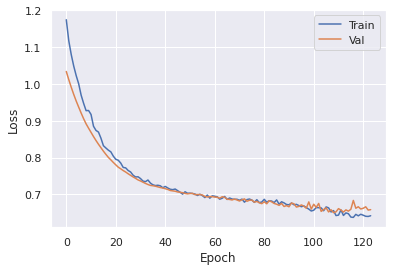

In [24]:
# テスト用result2の損失関数など
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの損失の描画
plt.plot(result2.history['loss'])

# 折れ線グラフによる検証データの損失の描画
plt.plot(result2.history['val_loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()

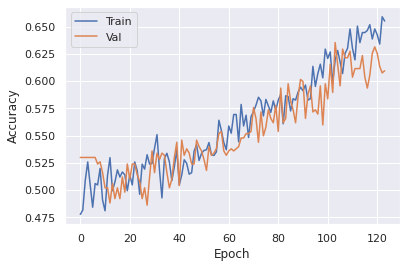

In [25]:
# テスト用result2の正解率
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの正解率の描画
plt.plot(result2.history['accuracy'])

# 折れ線グラフによる検証データの正解率の描画
plt.plot(result2.history['val_accuracy'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 描画の実行
plt.show()

In [27]:
print(X_test_t.shape)

(200, 6, 6)


In [26]:
pred_prob=model2.predict(X_test_t)

In [28]:
print(pred_prob[:12])

[[0.44155243]
 [0.45981693]
 [0.3187552 ]
 [0.29267836]
 [0.34802318]
 [0.73327667]
 [0.51520574]
 [0.32093877]
 [0.558807  ]
 [0.48795697]
 [0.5014661 ]
 [0.47618818]]


In [29]:
pred=np.round(pred_prob)
pred_df=pd.DataFrame(pred)
pred_df_int=pred_df[0].astype("int")
print(pred_df_int)
#pred_flatten=np.ravel(pred)
#print(pred_flatten)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: 0, Length: 200, dtype: int64


In [30]:
pred_df_int.dtype
final_df=pd.concat([X_test_date_list, pred_df_int], axis=1)


In [31]:
final_df

,Date,0
0,2012-01-26,0
1,2012-02-09,0
2,2012-02-24,0
3,2012-03-09,0
4,2012-03-23,0
...,...,...
195,2019-10-25,0
196,2019-11-08,0
197,2019-11-22,0
198,2019-12-09,0


In [33]:
final_df.to_csv(DATA_PATH + "sv_prediction7.csv",header=False,index=False)